#Take any benchmark dataset (both numeric and text) and apply preprocessing techniques on it.

## Packages (Setup)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
earlwood_data = pd.read_excel('Earlwood_Air_Data_17_18.xls')
earlwood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      8784 non-null   object 
 1   Time                                      8784 non-null   object 
 2   EARLWOOD WDR 1h average [°]               8759 non-null   float64
 3   EARLWOOD TEMP 1h average [°C]             8761 non-null   float64
 4   EARLWOOD WSP 1h average [m/s]             8759 non-null   float64
 5   EARLWOOD NO 1h average [pphm]             8295 non-null   float64
 6   EARLWOOD NO2 1h average [pphm]            8295 non-null   float64
 7   EARLWOOD CO 1h average [ppm]              0 non-null      float64
 8   EARLWOOD OZONE 1h average [pphm]          7918 non-null   float64
 9   EARLWOOD OZONE 4h rolling average [pphm]  8216 non-null   float64
 10  EARLWOOD PM10 1h average [µg/m³]    

# Dropping unnecessary columns from dataset

In [ ]:
cols = ['EARLWOOD CO 8h rolling average [ppm]', 'EARLWOOD CO 1h average [ppm]']
earlwood_data.drop(columns = cols, axis = 1, inplace = True)

# Step 1: Taking Care of the Missing Values

In [ ]:
earlwood_data.isna().sum()

Date                                          0
Time                                          0
EARLWOOD WDR 1h average [°]                  25
EARLWOOD TEMP 1h average [°C]                23
EARLWOOD WSP 1h average [m/s]                25
EARLWOOD NO 1h average [pphm]               489
EARLWOOD NO2 1h average [pphm]              489
EARLWOOD OZONE 1h average [pphm]            866
EARLWOOD OZONE 4h rolling average [pphm]    568
EARLWOOD PM10 1h average [µg/m³]             92
EARLWOOD PM2.5 1h average [µg/m³]           170
EARLWOOD HUMID 1h average [%]                22
EARLWOOD SD1 1h average [°]                  25
dtype: int64

## 1. Drop all Nan

In [ ]:
earlwood_dropNAN = earlwood_data.dropna()

In [ ]:
earlwood_dropNAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 8783
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      7670 non-null   object 
 1   Time                                      7670 non-null   object 
 2   EARLWOOD WDR 1h average [°]               7670 non-null   float64
 3   EARLWOOD TEMP 1h average [°C]             7670 non-null   float64
 4   EARLWOOD WSP 1h average [m/s]             7670 non-null   float64
 5   EARLWOOD NO 1h average [pphm]             7670 non-null   float64
 6   EARLWOOD NO2 1h average [pphm]            7670 non-null   float64
 7   EARLWOOD OZONE 1h average [pphm]          7670 non-null   float64
 8   EARLWOOD OZONE 4h rolling average [pphm]  7670 non-null   float64
 9   EARLWOOD PM10 1h average [µg/m³]          7670 non-null   float64
 10  EARLWOOD PM2.5 1h average [µg/m³]   

## 2. Fill missing with mean

In [ ]:
date_time = ['Date', 'Time']
dateTimedf = earlwood_data[['Date', 'Time']]

In [ ]:
earlwood_data.drop(columns = date_time, axis = 1, inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
cols  = earlwood_data.columns
earlwood_data = pd.DataFrame(imputer.fit_transform(earlwood_data), columns = cols)

In [ ]:
earlwood_data[date_time] = dateTimedf

In [ ]:
earlwood_data.head(5)

,EARLWOOD WDR 1h average [°],EARLWOOD TEMP 1h average [°C],EARLWOOD WSP 1h average [m/s],EARLWOOD NO 1h average [pphm],EARLWOOD NO2 1h average [pphm],EARLWOOD OZONE 1h average [pphm],EARLWOOD OZONE 4h rolling average [pphm],EARLWOOD PM10 1h average [µg/m³],EARLWOOD PM2.5 1h average [µg/m³],EARLWOOD HUMID 1h average [%],EARLWOOD SD1 1h average [°],Date,Time
0,152.3,22.6,0.4,0.000000,0.400000,2.000000,2.1,23.6,7.0,87.2,49.01,01/01/2017,01:00
1,134.0,22.6,0.3,1.288005,1.080325,1.633215,2.2,21.0,6.6,87.2,46.56,01/01/2017,02:00
2,132.2,22.6,0.3,0.000000,0.600000,1.700000,2.0,20.0,7.2,87.0,47.40,01/01/2017,03:00
3,125.8,22.7,0.2,0.000000,0.500000,1.700000,1.8,21.4,7.1,87.2,53.70,01/01/2017,04:00
4,107.9,22.8,0.6,0.000000,0.300000,2.100000,1.8,21.5,4.3,86.8,41.65,01/01/2017,05:00


# Step 2: Splitting data into Train and Test set

In [ ]:
y_cols = ['EARLWOOD NO 1h average [pphm]', 'EARLWOOD NO2 1h average [pphm]', 
          'EARLWOOD PM10 1h average [µg/m³]', 'EARLWOOD PM2.5 1h average [µg/m³]']
Y = earlwood_data[y_cols]

In [ ]:
X = earlwood_data.drop(columns = y_cols, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
print(f"Dimensions of training, testing data (x) = {X_train.shape}, {X_test.shape}")

Dimensions of training, testing data (x) = (6148, 9), (2636, 9)


In [ ]:
print(f"Dimensions of training, testing data (y) = {Y_train.shape}, {Y_test.shape}")

Dimensions of training, testing data (y) = (6148, 4), (2636, 4)


# Step 3: Normalizing Data

In [ ]:
earlwood_data.drop(columns = date_time, axis = 1, inplace = True)
cols  = earlwood_data.columns

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

earlwood_data = pd.DataFrame(norm.fit_transform(earlwood_data), columns = cols)

In [ ]:
earlwood_data

,EARLWOOD WDR 1h average [°],EARLWOOD TEMP 1h average [°C],EARLWOOD WSP 1h average [m/s],EARLWOOD NO 1h average [pphm],EARLWOOD NO2 1h average [pphm],EARLWOOD OZONE 1h average [pphm],EARLWOOD OZONE 4h rolling average [pphm],EARLWOOD PM10 1h average [µg/m³],EARLWOOD PM2.5 1h average [µg/m³],EARLWOOD HUMID 1h average [%],EARLWOOD SD1 1h average [°]
0,0.822024,0.121981,0.002159,0.000000,0.002159,0.010795,0.011335,0.127379,0.037782,0.470654,0.264527
1,0.790517,0.133326,0.001770,0.007598,0.006373,0.009635,0.012979,0.123887,0.038936,0.514426,0.274675
2,0.786368,0.134432,0.001784,0.000000,0.003569,0.010112,0.011897,0.118966,0.042828,0.517504,0.281950
3,0.760774,0.137278,0.001209,0.000000,0.003024,0.010281,0.010885,0.129416,0.042937,0.527341,0.324750
4,0.728787,0.153998,0.004053,0.000000,0.002026,0.014184,0.012158,0.145217,0.029043,0.586272,0.281316
...,...,...,...,...,...,...,...,...,...,...,...
8779,0.858272,0.119783,0.004687,0.000000,0.001042,0.015103,0.014582,0.123429,0.044268,0.409346,0.252586
8780,0.885786,0.111272,0.004880,0.000000,0.000488,0.014153,0.014153,0.090775,0.052708,0.381156,0.215126
8781,0.910589,0.105422,0.005064,0.000000,0.000460,0.013811,0.013350,0.066292,0.037749,0.349873,0.176317
8782,0.915757,0.102761,0.005002,0.000000,0.000455,0.013641,0.013641,0.061384,0.025008,0.342386,0.169738


# Step 4: OneHotEncoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib.colors

In [ ]:
data, labels = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [ ]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'green'])
np.random.seed(0)

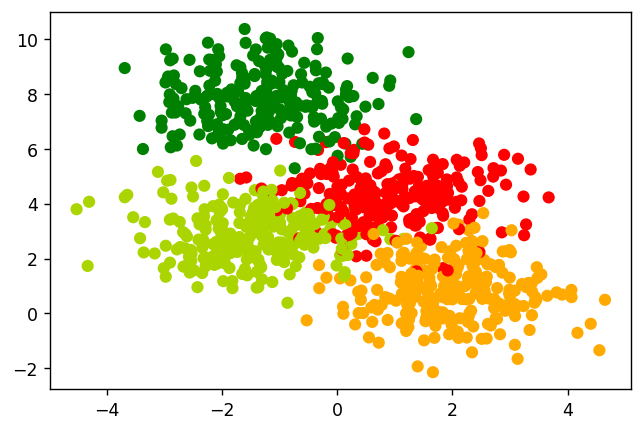

In [ ]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = cmap)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_test.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [ ]:
Y_train[:20]

array([0, 3, 3, 2, 2, 0, 3, 2, 0, 1, 0, 3, 1, 3, 1, 2, 1, 0, 2, 2])

In [ ]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train, axis = 1)).toarray()
Y_OH_test  = enc.fit_transform(np.expand_dims(Y_test, axis = 1)).toarray()

In [ ]:
Y_OH_train[:20]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])